In [ ]:
import torch
import cv2
import numpy as np
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Step 2: Preprocess image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image

In [ ]:
def understand_scene(image):
    try:
        processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
        model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

        inputs = processor(image, return_tensors="pt")
        out = model.generate(**inputs)
        caption = processor.decode(out[0], skip_special_tokens=True)
        return caption
    except Exception as e:
        print(f"Error during scene understanding: {e}")
        return ""

In [ ]:
def analyze_scene(caption):
    garbage_keywords = ['garbage', 'trash', 'polluted', 'waste', 'dirty']
    caption_lower = caption.lower()

    for word in garbage_keywords:
        if word in caption_lower:
            return True  # Garbage is detected in the scene
    return False  # No garbage detected

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fv1vm4BROZn4YEc1jjTm")
project = rf.workspace("final-year-project-qnqjj").project("waste-classifcation-label")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-classifcation-label-1 in yolov8:: 100%|██████████| 2642/2642 [00:01<00:00, 1890.26it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/waste-classifcation-label-1/data.yaml epochs=35 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 250MB/s]
New https://pypi.org/project/ultralytics/8.3.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/waste-classifcation-label-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, clas

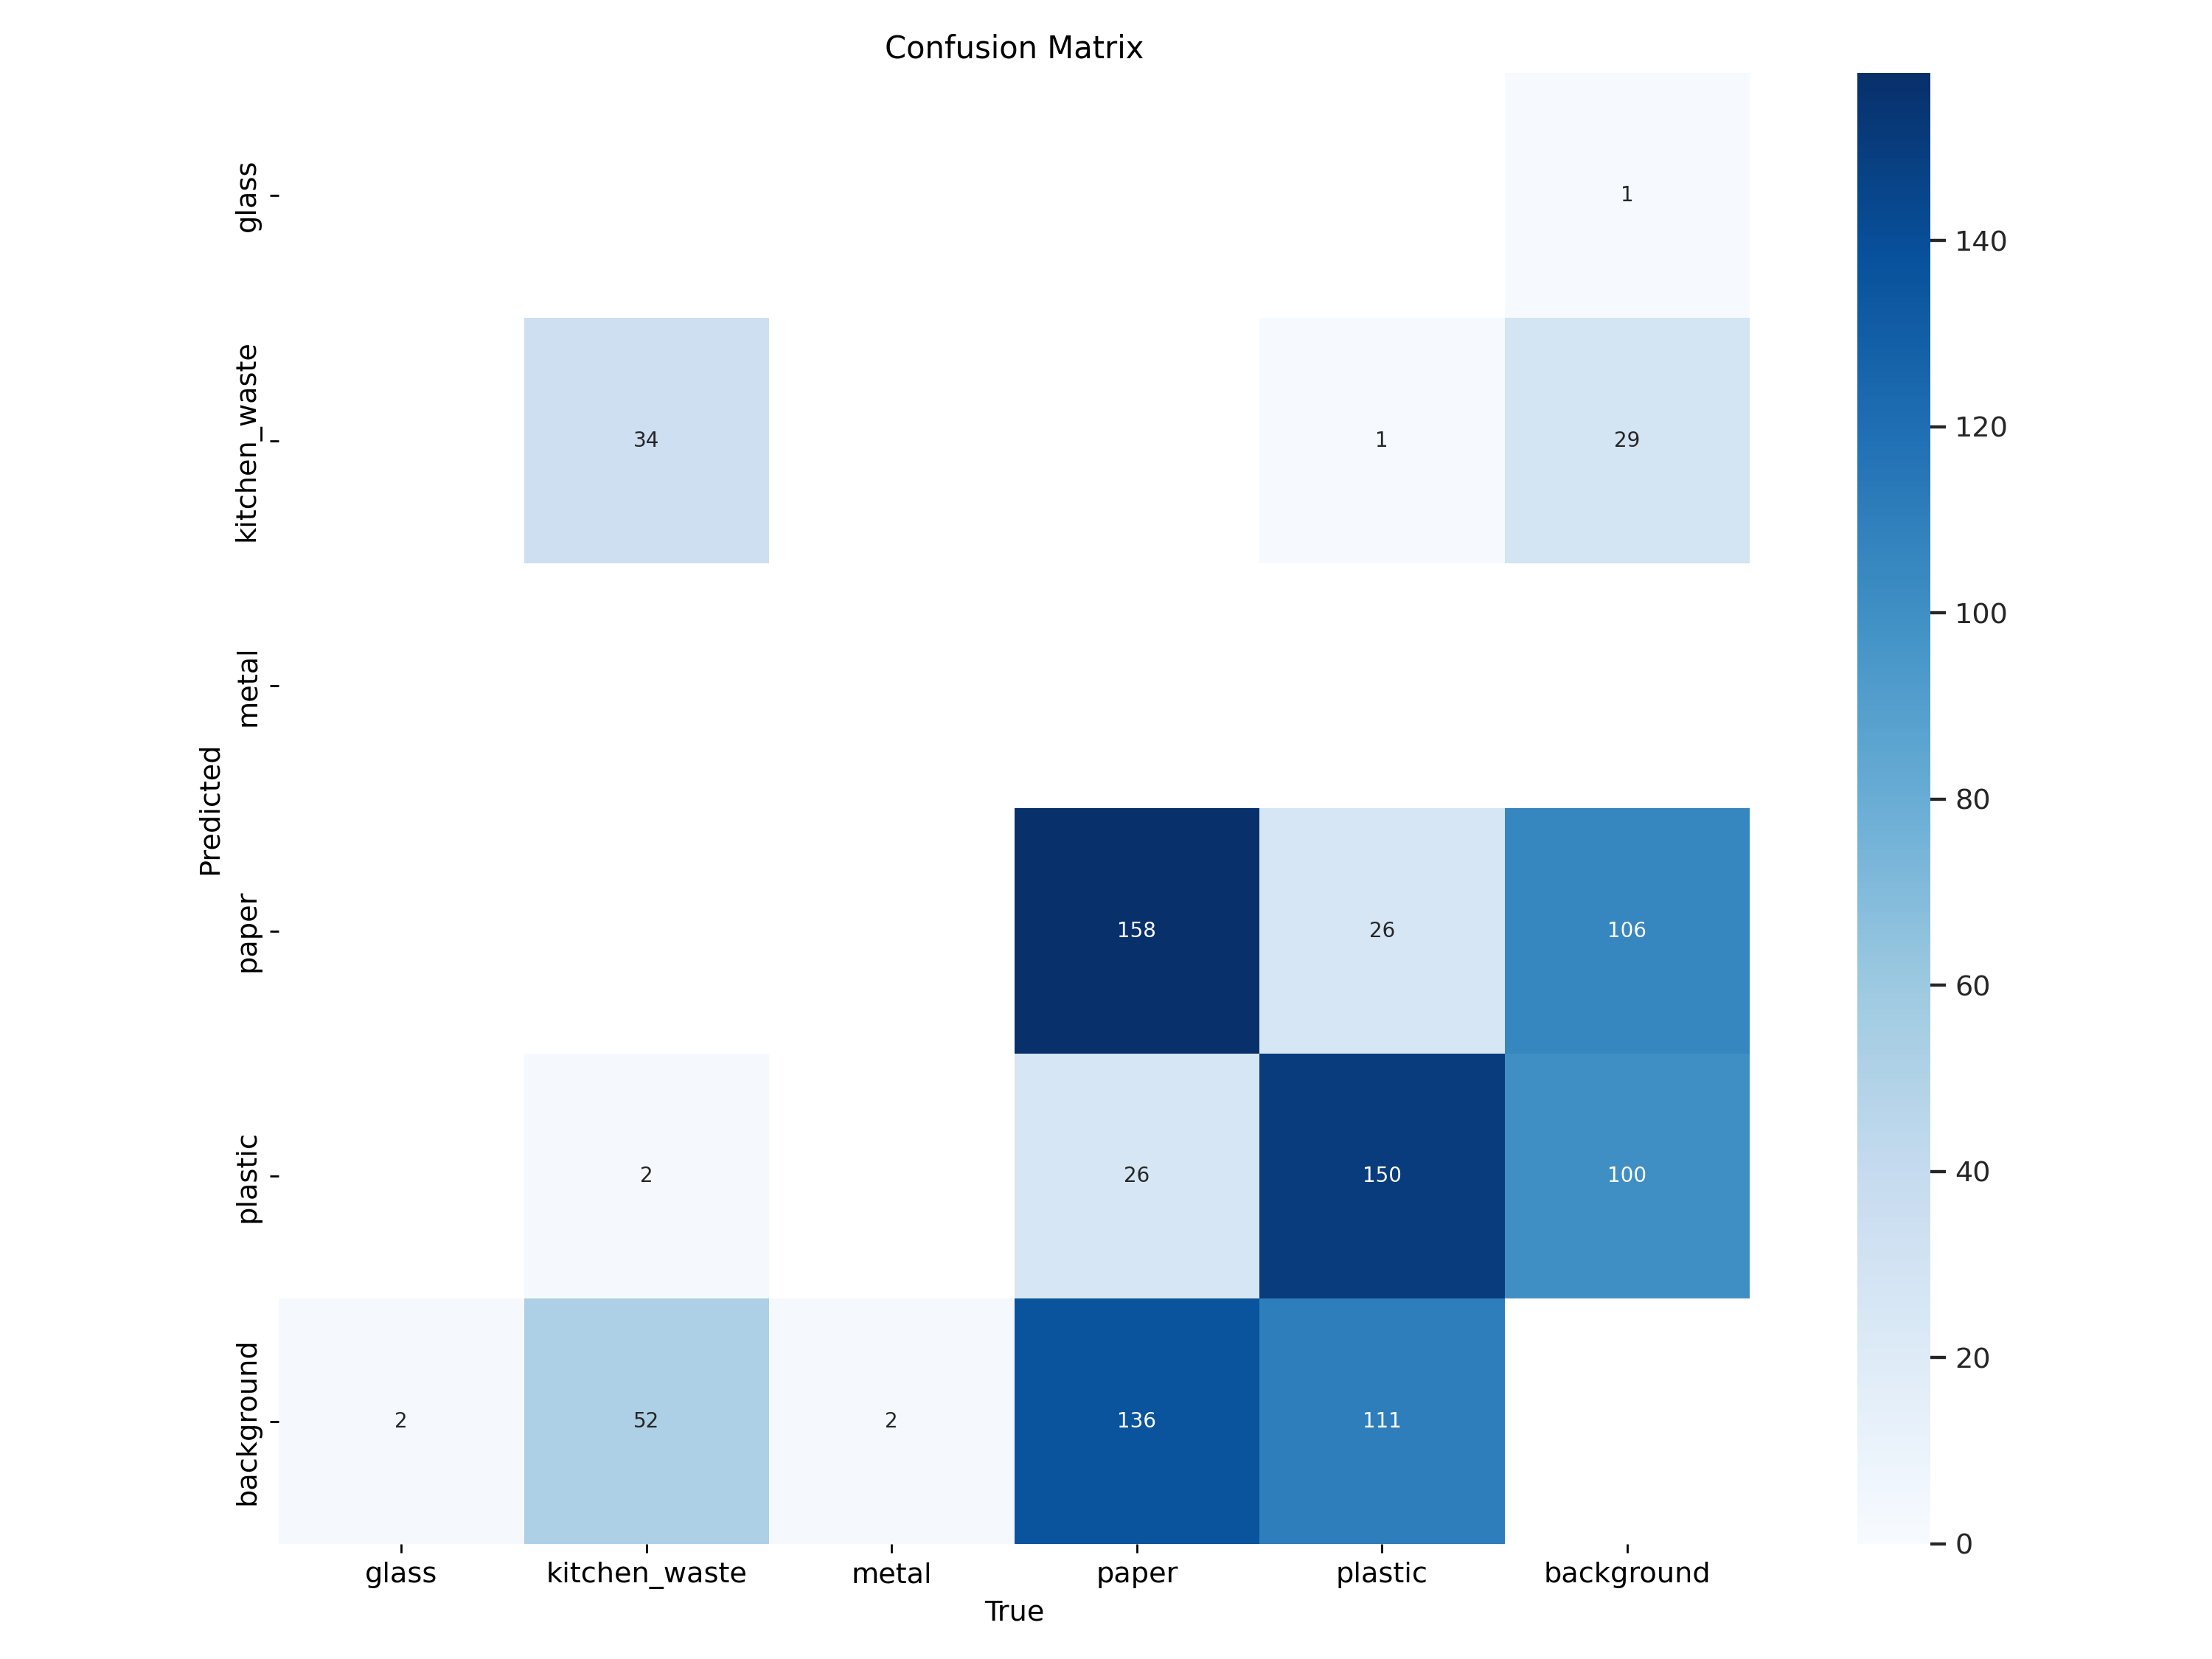

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

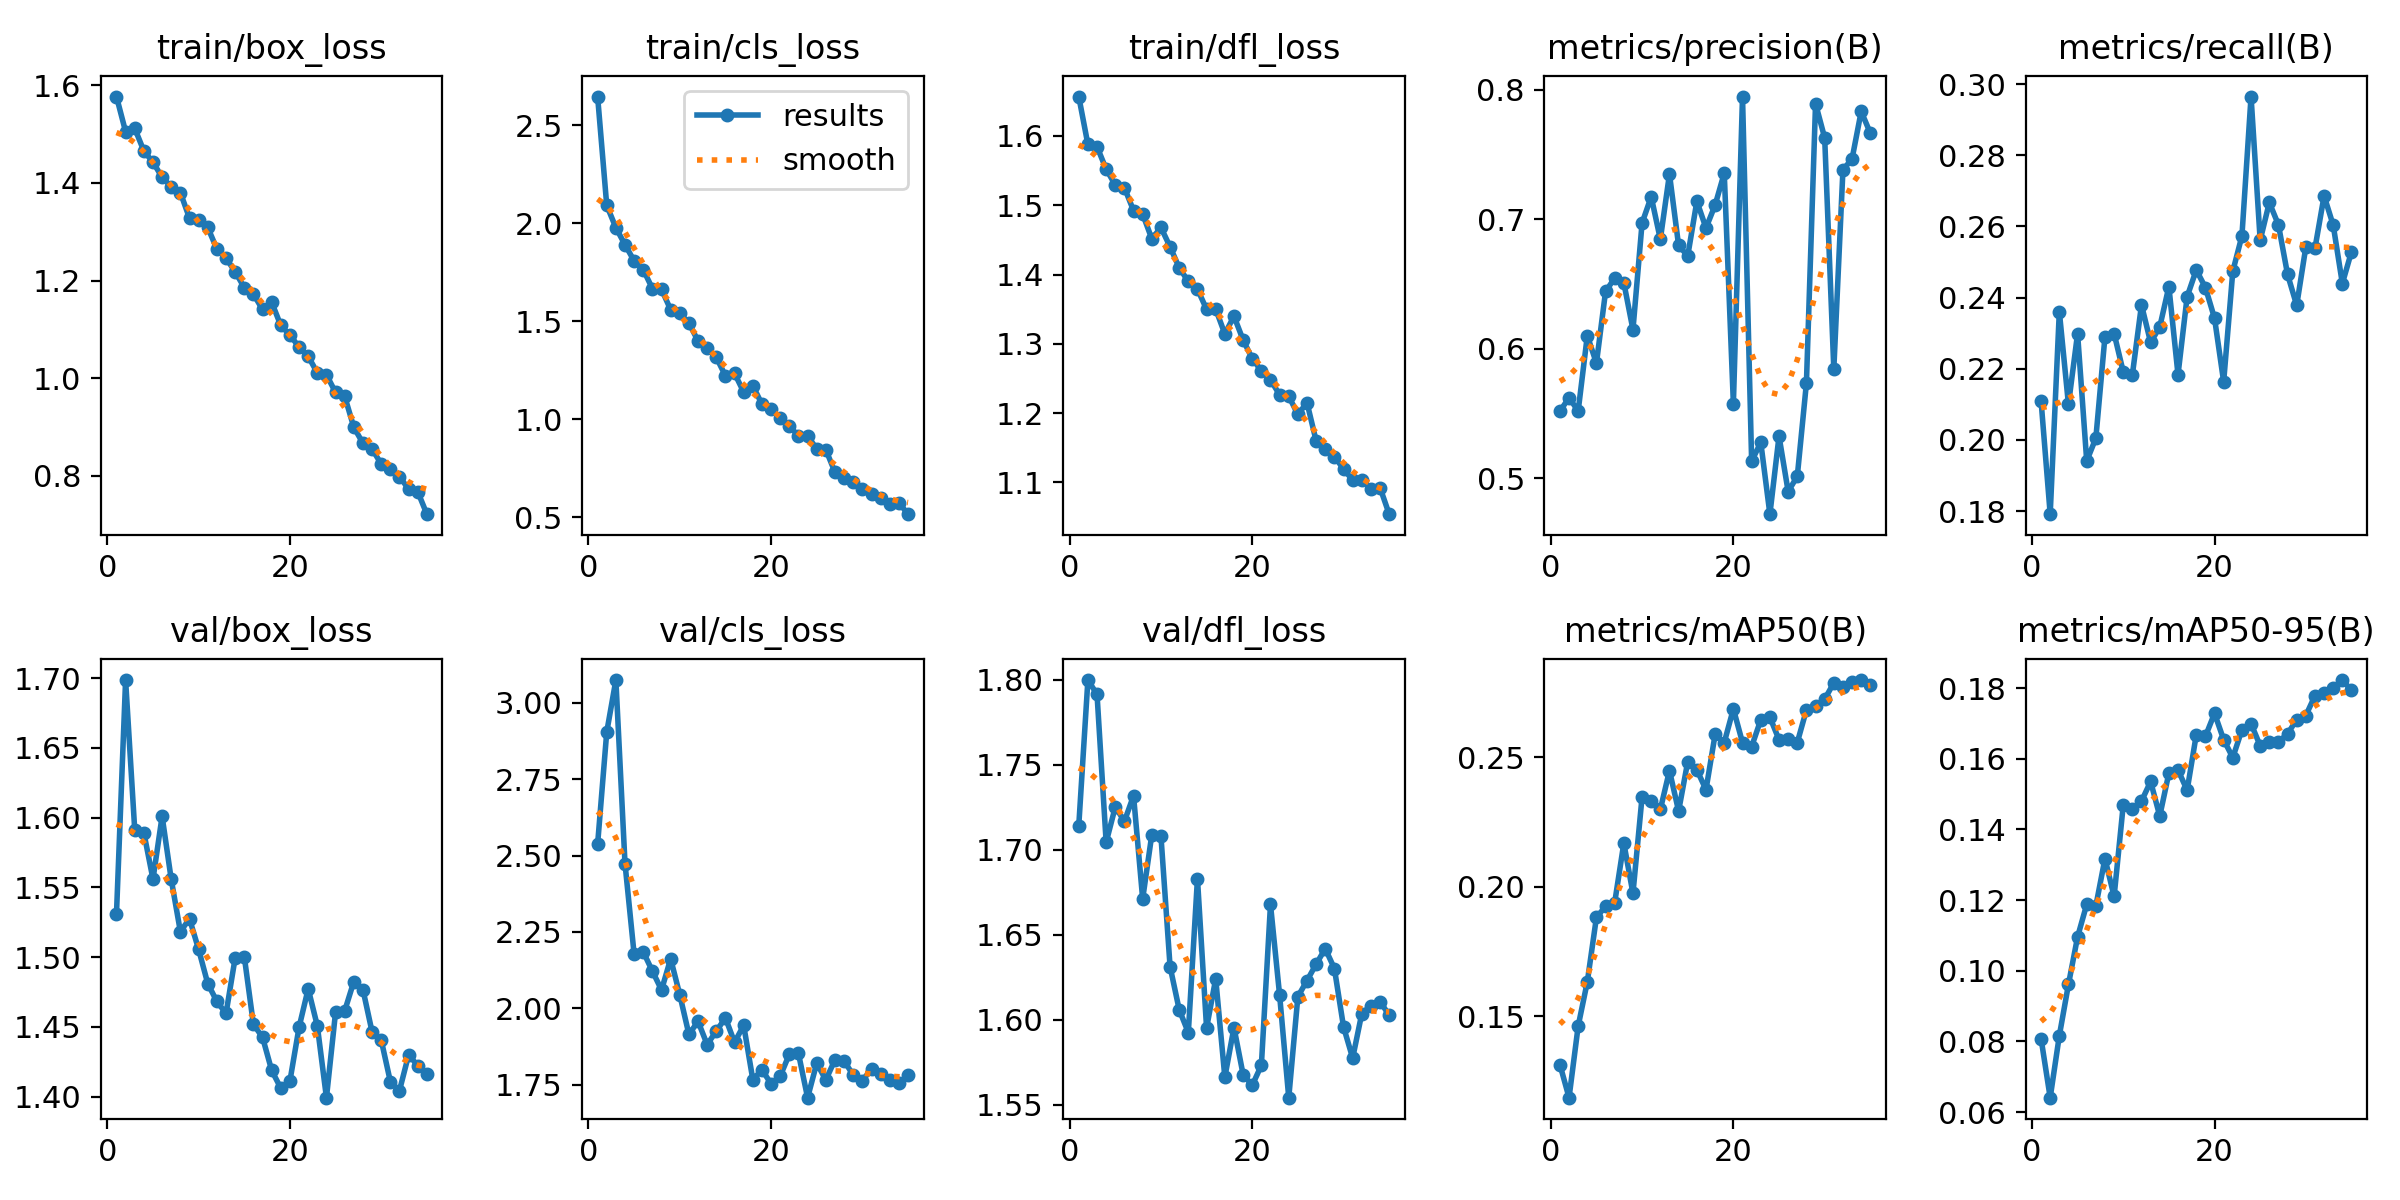

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

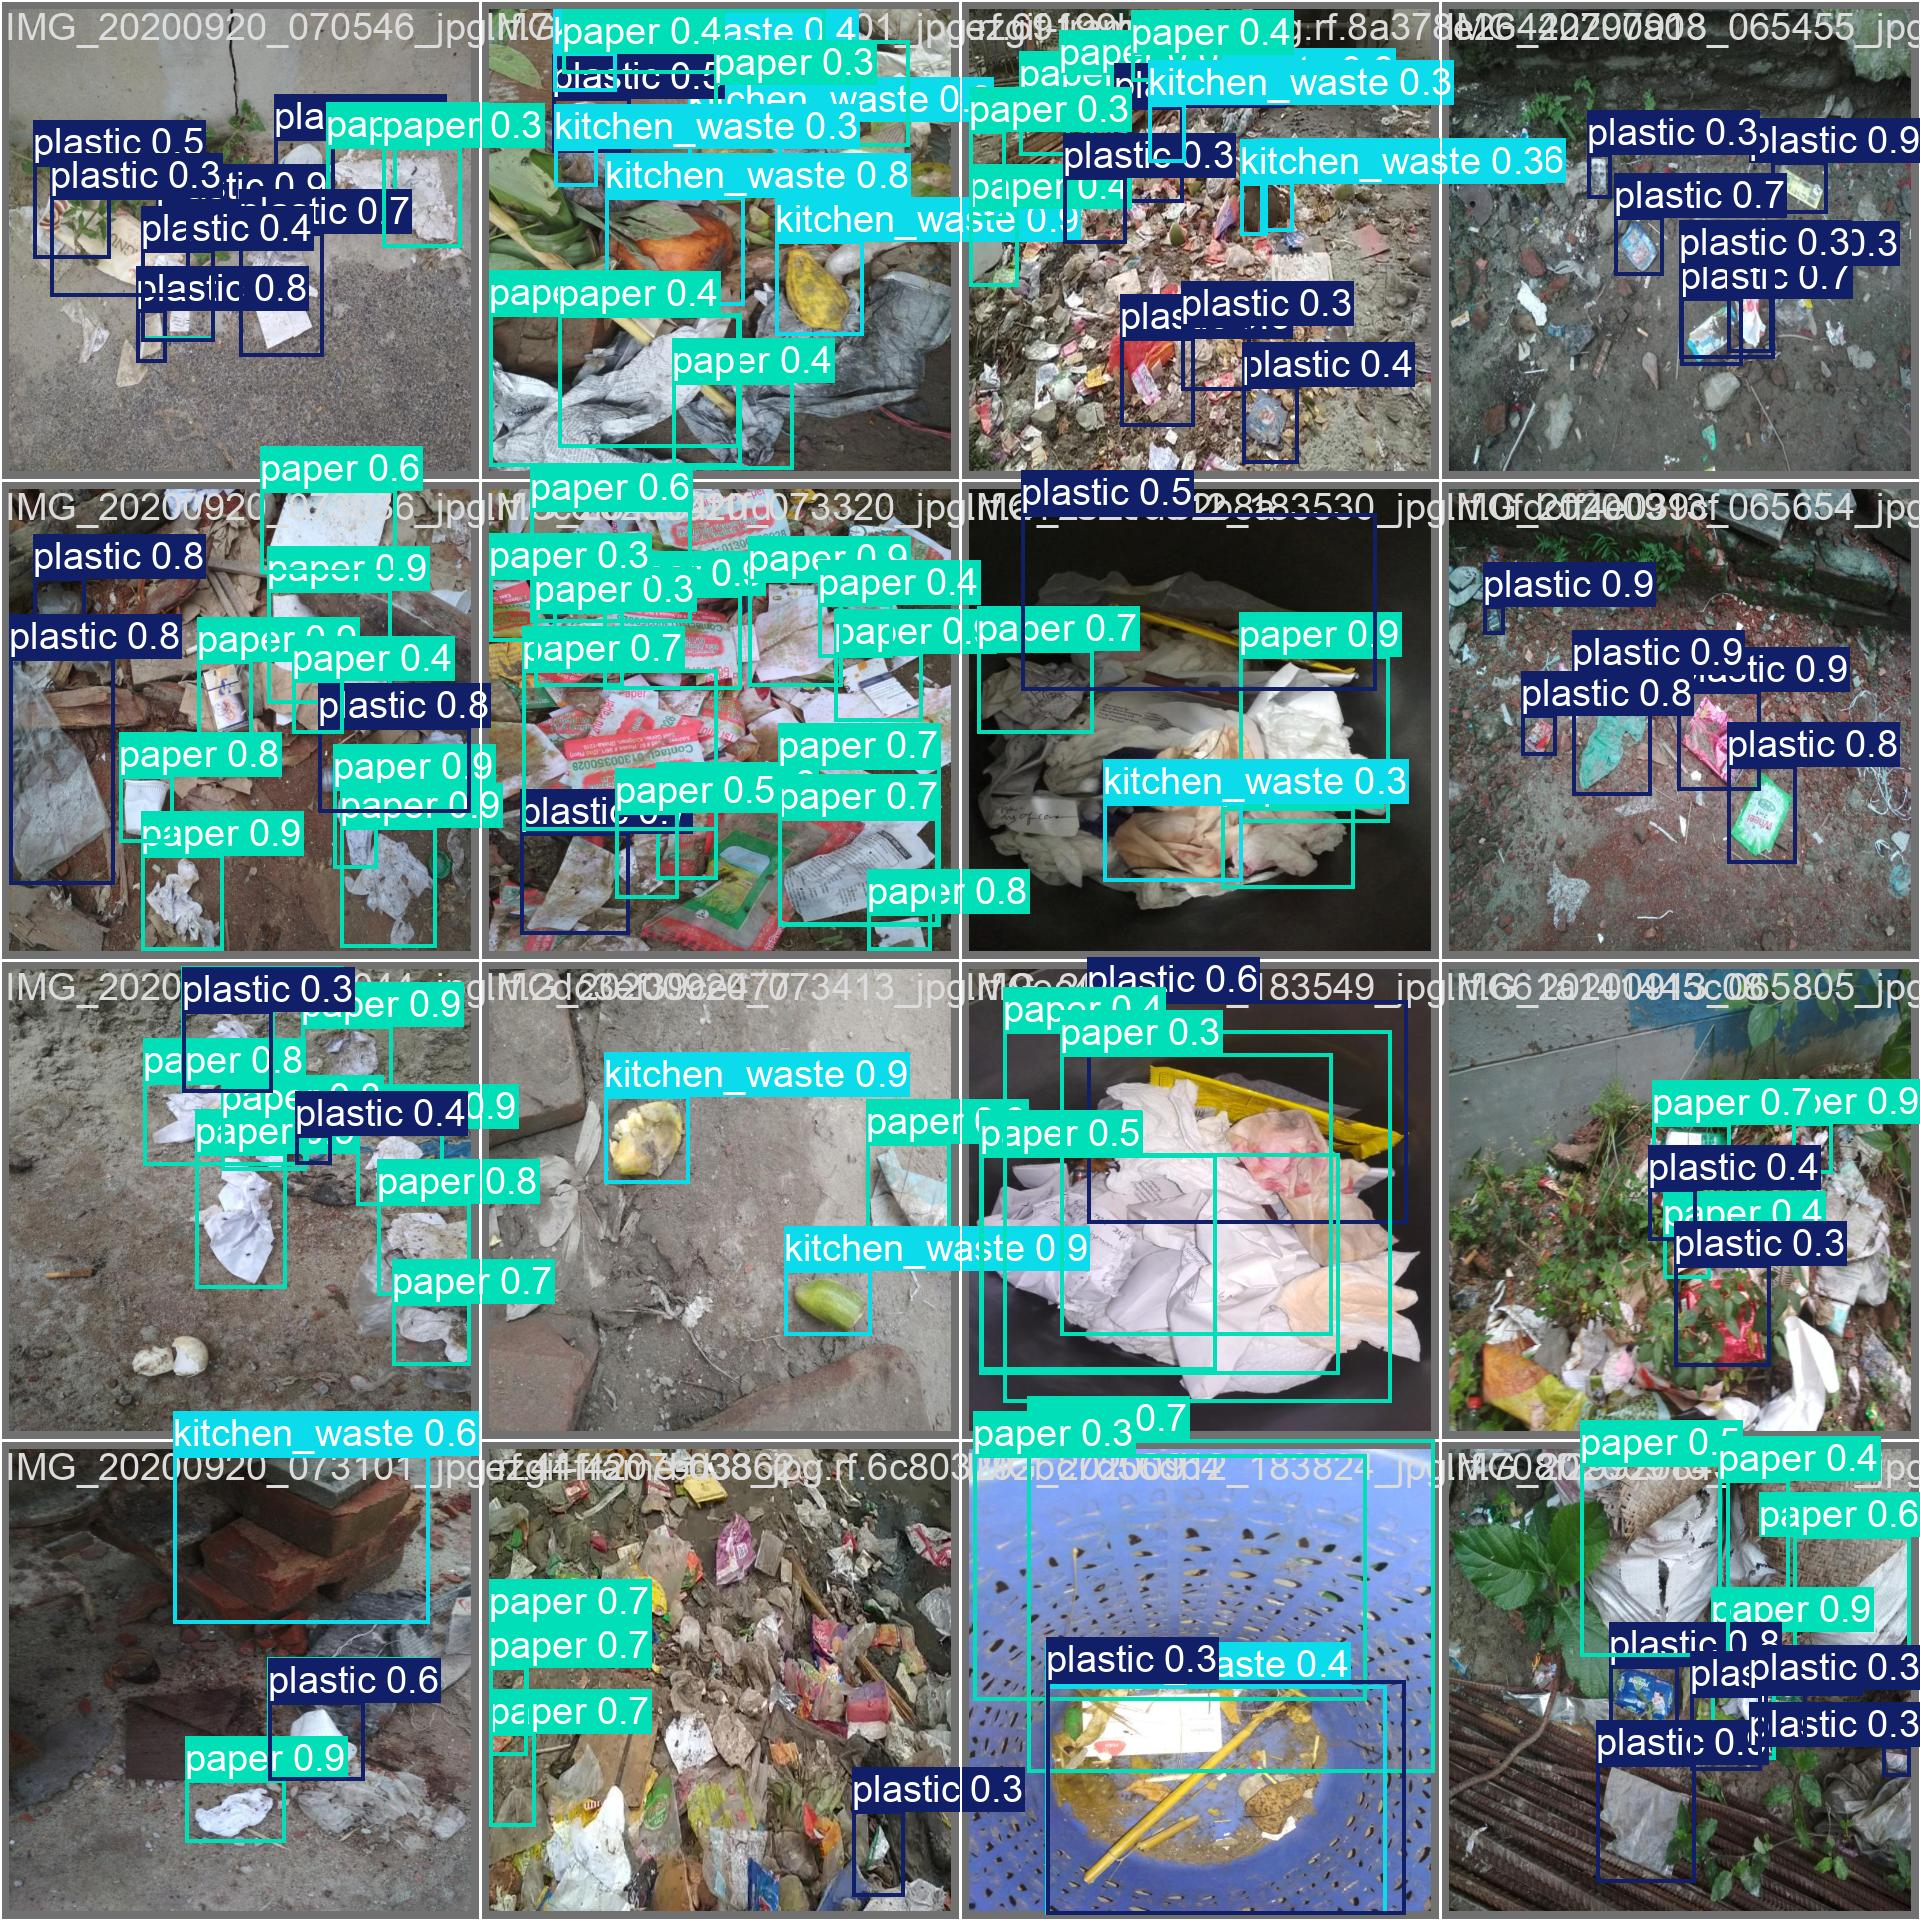

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Validate the model
results = model.val(data="/content/waste-classifcation-label-1/data.yaml", imgsz=640, save=True)

# Print metrics
print(f"Precision: {results.box.map:.4f}")
print(f"mAP@50: {results.box.map50:.4f}")




Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/waste-classifcation-label-1/valid/labels.cache... 99 images, 0 backgrounds, 0 corrupt: 100%|██████████| 99/99 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all         99        700      0.749      0.251      0.263      0.168
                 glass          1          2          1          0          0          0
         kitchen_waste         27         88      0.537      0.284       0.31      0.178
                 metal          2          2          1          0          0          0
                 paper         80        320      0.618      0.503      0.519      0.355
               plastic         63        288      0.591      0.466      0.484      0.305
Speed: 7.6ms preprocess, 12.6ms inference, 0.0ms loss, 15.2ms postprocess per image
Results saved to runs/detect/val
Precision: 0.1677
mAP@50: 0.2627


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
def print_image():
  import glob
  from IPython.display import Image, display

  # Define the base path where the folders are located
  base_path = '/content/runs/detect/'

  # List all directories that start with 'predict' in the base path
  subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
                if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

  # Find the latest folder by modification time
  latest_folder = max(subfolders, key=os.path.getmtime)

  image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

  # Display each image
  for image_path in image_paths:
      display(Image(filename=image_path, width=600))
      print("\n")


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.


Scene of the Image:  there are many bags of garbage on the ground next to a trash can
Garbage detected in the scene
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/garb_3.jpg: 608x800 5 papers, 4 plastics, 37.6ms
Speed: 4.9ms preprocess, 37.6ms inference, 556.2ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


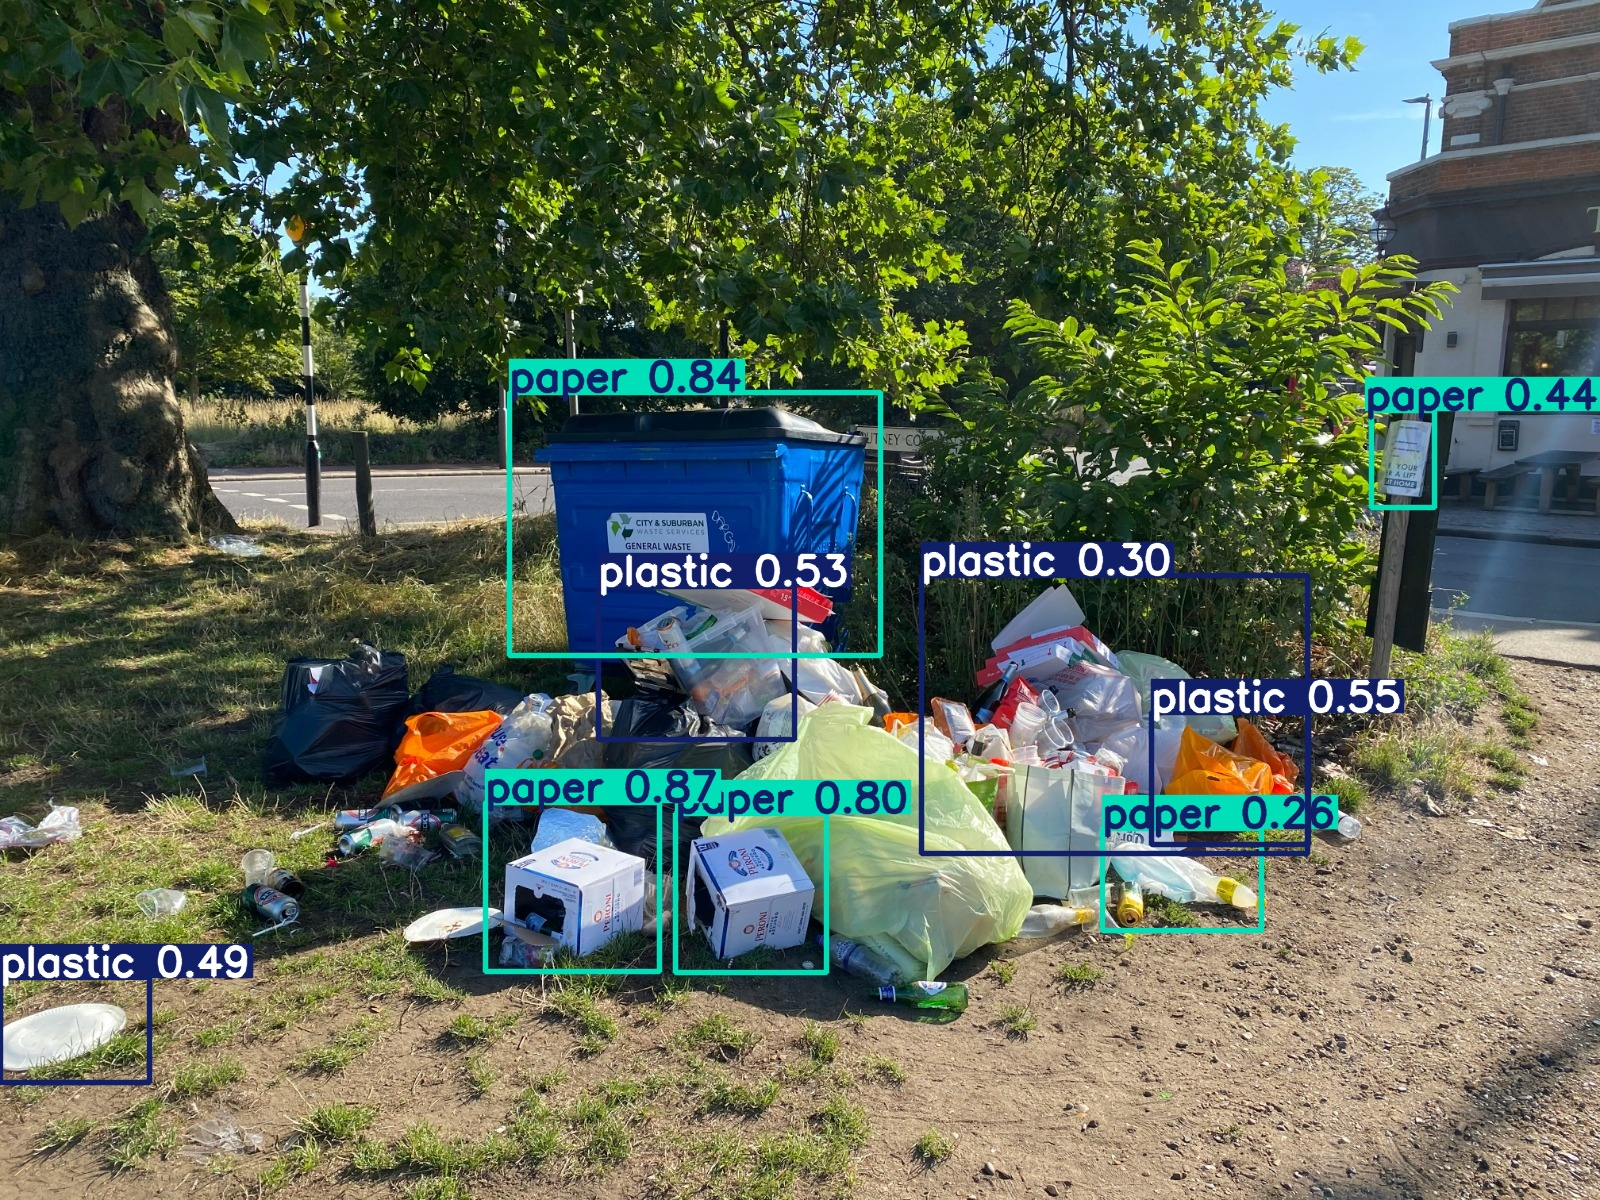

In [ ]:
from PIL import Image
image_path ="/content/garb_3.jpg"
image = preprocess_image(image_path)
# Step 2: Scene understanding using NLP
caption = understand_scene(image)
print("Scene of the Image: ",caption)
if(analyze_scene(caption)):
  print("Garbage detected in the scene")
else:
  print("No garbage detected in the scene")
if(analyze_scene(caption)):
  !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/garb_3.jpg save=True
  print_image()

In [ ]:
from google.colab import files
files.download("/content/runs")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>